# CSV mit Python verarbeiten

Python bietet mit der [pandas Library](https://pandas.pydata.org/index.html) ein mächtiges Werkzeug um strukturierte Daten zu verarbeiten. Die Daten können dabei sehr einfach visualisiert, verbunden oder explorativ analysiert werden.

In diesem Notebook soll dies ein einem Beispiel gezeigt werden. Als Beispiel-Datensatz nehmen wir den Datensatz [«Aufenthaltsdauer der Wohnbevölkerung nach Alter, Geschlecht, Herkunft und Stadtkreis»](https://data.stadt-zuerich.ch/dataset/bev_aufenthaltsdauer_bestand_alter_geschlecht_herkunft_stadtkreis_seit1993_od5241).

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
result = requests.get(
    'https://data.stadt-zuerich.ch/api/3/action/package_show?id=bev_aufenthaltsdauer_bestand_alter_geschlecht_herkunft_stadtkreis_seit1993_od5241'
)
dataset = result.json()['result']
stay_url = dataset['resources'][0]['url']
df = pd.read_csv(stay_url)
df

,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
0,1993,0-19,1,1,M,1,Schweizer/in,1,Kreis 1,2.05,6.00,11.30,7.0
1,1993,0-19,1,1,M,1,Schweizer/in,2,Kreis 2,2.80,6.80,11.80,7.5
2,1993,0-19,1,1,M,1,Schweizer/in,3,Kreis 3,3.00,7.10,11.90,7.6
3,1993,0-19,1,1,M,1,Schweizer/in,4,Kreis 4,2.20,5.70,10.40,6.7
4,1993,0-19,1,1,M,1,Schweizer/in,5,Kreis 5,2.00,5.70,11.10,6.8
5,1993,0-19,1,1,M,1,Schweizer/in,6,Kreis 6,2.80,6.80,11.70,7.5
6,1993,0-19,1,1,M,1,Schweizer/in,7,Kreis 7,3.00,6.90,11.60,7.4
7,1993,0-19,1,1,M,1,Schweizer/in,8,Kreis 8,2.50,5.85,10.95,7.1
8,1993,0-19,1,1,M,1,Schweizer/in,9,Kreis 9,3.20,7.40,12.00,7.8
9,1993,0-19,1,1,M,1,Schweizer/in,10,Kreis 10,2.80,6.60,10.70,7.1


## Schauen wir uns doch mal ein paar Aggregrationen an, um ein Gefühl für den Inhalt des Dataframes zu bekommen

In [3]:
df.groupby(['StichtagDatJahr', 'KreisLang', 'KreisCd']).size().reset_index(name='counts').sort_values(by=['StichtagDatJahr', 'KreisCd']).reset_index(drop=True)

,StichtagDatJahr,KreisLang,KreisCd,counts
0,1993,Kreis 1,1,21
1,1993,Kreis 2,2,20
2,1993,Kreis 3,3,20
3,1993,Kreis 4,4,21
4,1993,Kreis 5,5,22
5,1993,Kreis 6,6,22
6,1993,Kreis 7,7,22
7,1993,Kreis 8,8,21
8,1993,Kreis 9,9,21
9,1993,Kreis 10,10,20


In [4]:
df.groupby('HerkunftLang').size().reset_index(name='counts')

,HerkunftLang,counts
0,Ausländer/in,3173
1,Schweizer/in,3522


In [5]:
df.groupby(['KreisLang', 'KreisCd']).size().reset_index(name='counts').sort_values(by=['KreisCd']).reset_index(drop=True)

,KreisLang,KreisCd,counts
0,Kreis 1,1,553
1,Kreis 2,2,563
2,Kreis 3,3,575
3,Kreis 4,4,549
4,Kreis 5,5,532
5,Kreis 6,6,558
6,Kreis 7,7,569
7,Kreis 8,8,552
8,Kreis 9,9,564
9,Kreis 10,10,566


## Okay, erstellen wir doch mal einen einfachen Plot und wählen dafür einen Style der uns gefällt

In [6]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [13]:
plt.style.use('fivethirtyeight')

In [30]:
# get data of Swiss men and women in kreis 1 (age 20-39)
women_2039_ch_k1 = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == 1)].reset_index()
men_2039_ch_k1 = df[(df.SexKurz == 'M') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == 1)].reset_index()
men_2039_ch_k1

,index,StichtagDatJahr,AlterV20Kurz,AlterV20Sort,SexCd,SexKurz,HerkunftCd,HerkunftLang,KreisCd,KreisLang,AufDauerP25,AufDauerMedian,AufDauerP75,AufDauerMittel
0,48,1993,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.70,13.00,9.6
1,298,1994,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.00,5.50,12.50,9.5
2,550,1995,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.15,5.75,12.90,9.8
3,806,1996,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.10,5.40,12.80,9.7
4,1064,1997,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.20,13.60,9.7
5,1319,1998,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.10,5.20,13.20,9.7
6,1578,1999,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.20,13.40,9.6
7,1833,2000,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.30,13.10,9.6
8,2087,2001,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.20,5.60,13.20,9.8
9,2343,2002,20-39,2,1,M,1,Schweizer/in,1,Kreis 1,2.30,5.85,12.10,9.7


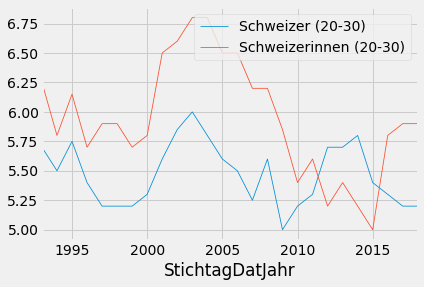

In [31]:
fig, ax = plt.subplots()
men_2039_ch_k1.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", label="Schweizer (20-30)", ax=ax, linewidth=0.8)
women_2039_ch_k1.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", label="Schweizerinnen (20-30)", ax=ax, linewidth=0.8)

## Und wie sieht das für alle Kreise aus?

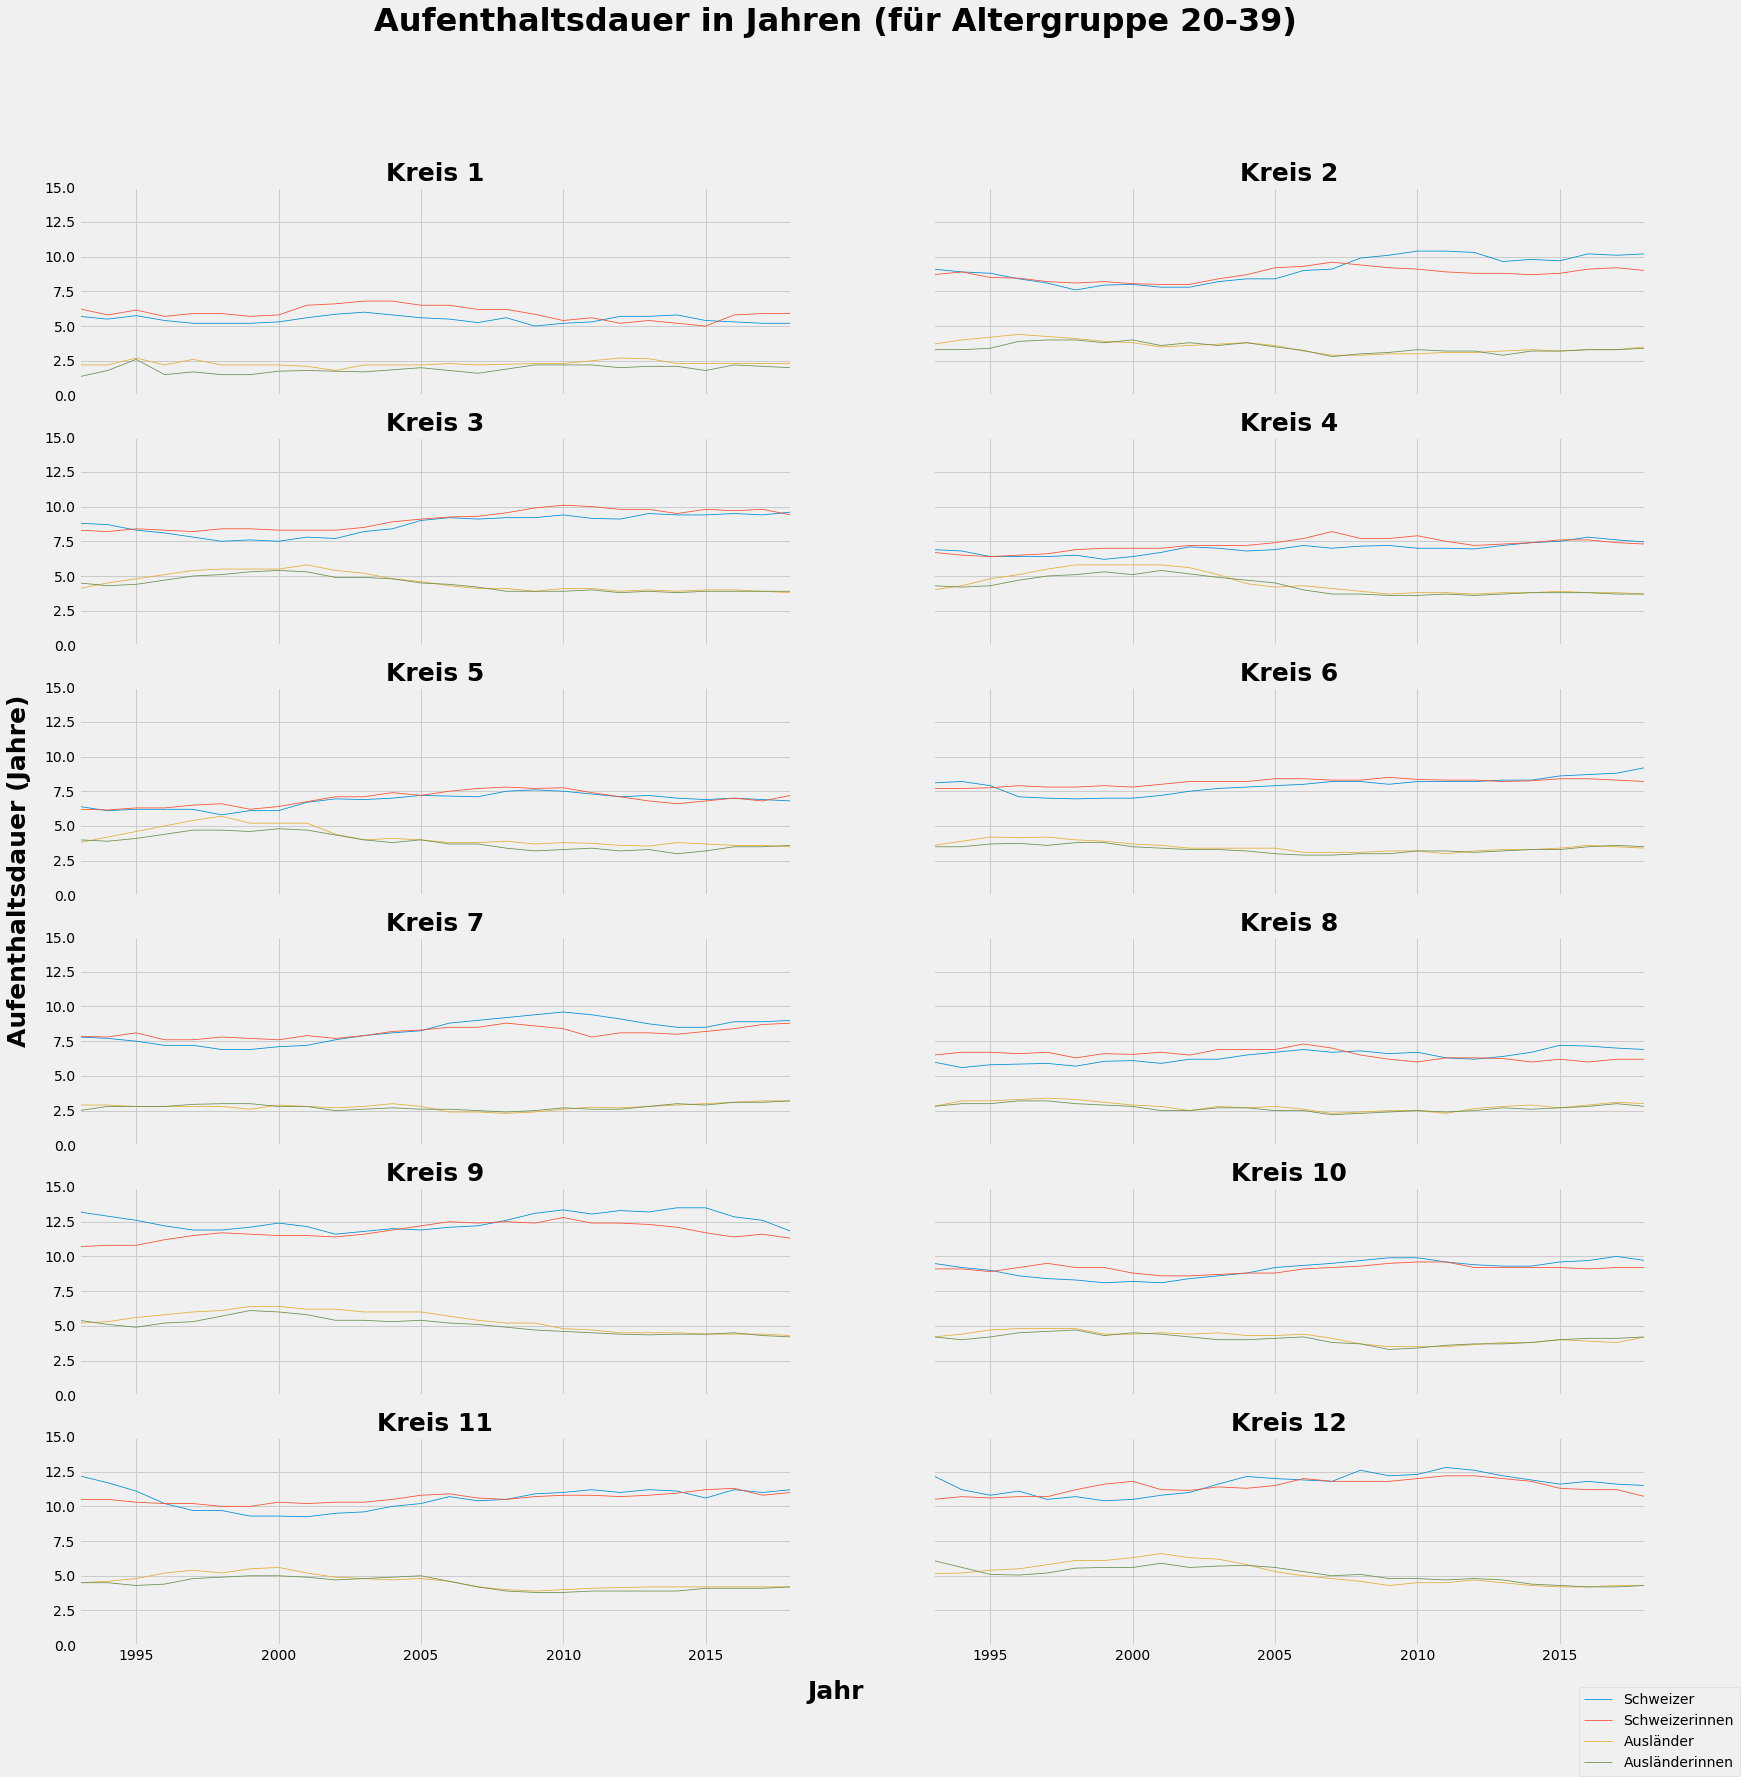

In [22]:
rows = 6
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, sharey=True, sharex=True, figsize=(25,25))
fig.suptitle('Aufenthaltsdauer in Jahren (für Altergruppe 20-39)', fontsize=32, fontweight='bold');
k = 1
for i in range(rows):
    for j in range(cols):
        ax[i,j].set_ylim([0, 15])
        ax[i,j].set_title(label='Kreis %s' % k, fontdict={"fontsize": 25, "fontweight": 'bold'})
        
        m2039ch = df[(df.SexKurz == 'M') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == k)].reset_index()
        w2039ch = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == k)].reset_index()
        m2039for = df[(df.SexKurz == 'M') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Ausländer/in') & (df.KreisCd == k)].reset_index()
        w2039for = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Ausländer/in') & (df.KreisCd == k)].reset_index()
   
        m2039ch.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=0.8)
        w2039ch.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=0.8)
        m2039for.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=0.8)
        w2039for.plot(kind='line', y='AufDauerMedian', x="StichtagDatJahr", ax=ax[i,j], linewidth=0.8)
        
        ax[i,j].legend().set_visible(False)
        ax[i,j].xaxis.label.set_visible(False)
        k = k + 1
        
# Create the legend
fig.legend(handles=ax[(rows-1),(cols-1)].lines,     # The line objects
           labels=[
               'Schweizer',
               'Schweizerinnen',
               'Ausländer',
               'Ausländerinnen',
           ],   # The labels for each line
           loc="lower right",   # Position of legend
           borderaxespad=0.1    # Small spacing around legend box
           )

fig.text(0.5, 0.04, 'Jahr', ha='center', fontdict={"fontsize": 25, "fontweight": 'bold'})
fig.text(0.04, 0.5, 'Aufenthaltsdauer (Jahre)', va='center', rotation='vertical', fontdict={"fontsize": 25, "fontweight": 'bold'})

plt.show()

## Schauen wir uns einen Kreis doch mal im Detail an
Da wir in den Daten die 25. Perzentile, den Median und die 75 Perzenzile haben, können wir die Jahre als Box-Plot darstellen.
Weil unser Dataframe bereits die ausgerechneten Werte hat, müssen wir dem Box-Plot diese Werte mitgeben um eine saubere Darstellung zu bekommen.

In [44]:
data = df[(df.SexKurz == 'W') & (df.AlterV20Kurz == '20-39') & (df.HerkunftLang == 'Schweizer/in') & (df.KreisCd == 1)].reset_index(drop=True)
raw_stats = data.to_dict('records')
raw_stats

[{'StichtagDatJahr': 1993,
  'AlterV20Kurz': '20-39',
  'AlterV20Sort': 2,
  'SexCd': 2,
  'SexKurz': 'W',
  'HerkunftCd': 1,
  'HerkunftLang': 'Schweizer/in',
  'KreisCd': 1,
  'KreisLang': 'Kreis 1',
  'AufDauerP25': 2.4,
  'AufDauerMedian': 6.25,
  'AufDauerP75': 13.3,
  'AufDauerMittel': 9.5},
 {'StichtagDatJahr': 1994,
  'AlterV20Kurz': '20-39',
  'AlterV20Sort': 2,
  'SexCd': 2,
  'SexKurz': 'W',
  'HerkunftCd': 1,
  'HerkunftLang': 'Schweizer/in',
  'KreisCd': 1,
  'KreisLang': 'Kreis 1',
  'AufDauerP25': 2.0,
  'AufDauerMedian': 5.8,
  'AufDauerP75': 12.6,
  'AufDauerMittel': 9.1},
 {'StichtagDatJahr': 1995,
  'AlterV20Kurz': '20-39',
  'AlterV20Sort': 2,
  'SexCd': 2,
  'SexKurz': 'W',
  'HerkunftCd': 1,
  'HerkunftLang': 'Schweizer/in',
  'KreisCd': 1,
  'KreisLang': 'Kreis 1',
  'AufDauerP25': 2.2,
  'AufDauerMedian': 6.15,
  'AufDauerP75': 13.0,
  'AufDauerMittel': 9.4},
 {'StichtagDatJahr': 1996,
  'AlterV20Kurz': '20-39',
  'AlterV20Sort': 2,
  'SexCd': 2,
  'SexKurz': 'W

In [54]:
stats = [
    {
        'label': s['StichtagDatJahr'],
        'med': s['AufDauerMedian'],
        'q1': s['AufDauerP25'],
        'q3': s['AufDauerP75'],
        'mean': s['AufDauerMittel'],
        'whislo': 0.0,
        'whishi': 20.0,
        'fliers': []
    } for s in raw_stats]
stats

[{'label': 1993,
  'med': 6.25,
  'q1': 2.4,
  'q3': 13.3,
  'mean': 9.5,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 1994,
  'med': 5.8,
  'q1': 2.0,
  'q3': 12.6,
  'mean': 9.1,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 1995,
  'med': 6.15,
  'q1': 2.2,
  'q3': 13.0,
  'mean': 9.4,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 1996,
  'med': 5.7,
  'q1': 2.2,
  'q3': 12.4,
  'mean': 9.0,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 1997,
  'med': 5.9,
  'q1': 2.4,
  'q3': 13.0,
  'mean': 9.4,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 1998,
  'med': 5.9,
  'q1': 2.2,
  'q3': 13.3,
  'mean': 9.6,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 1999,
  'med': 5.7,
  'q1': 2.0,
  'q3': 13.2,
  'mean': 9.5,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []},
 {'label': 2000,
  'med': 5.8,
  'q1': 2.2,
  'q3': 13.5,
  'mean': 9.6,
  'whislo': 0.0,
  'whishi': 20.0,
  'fliers': []}

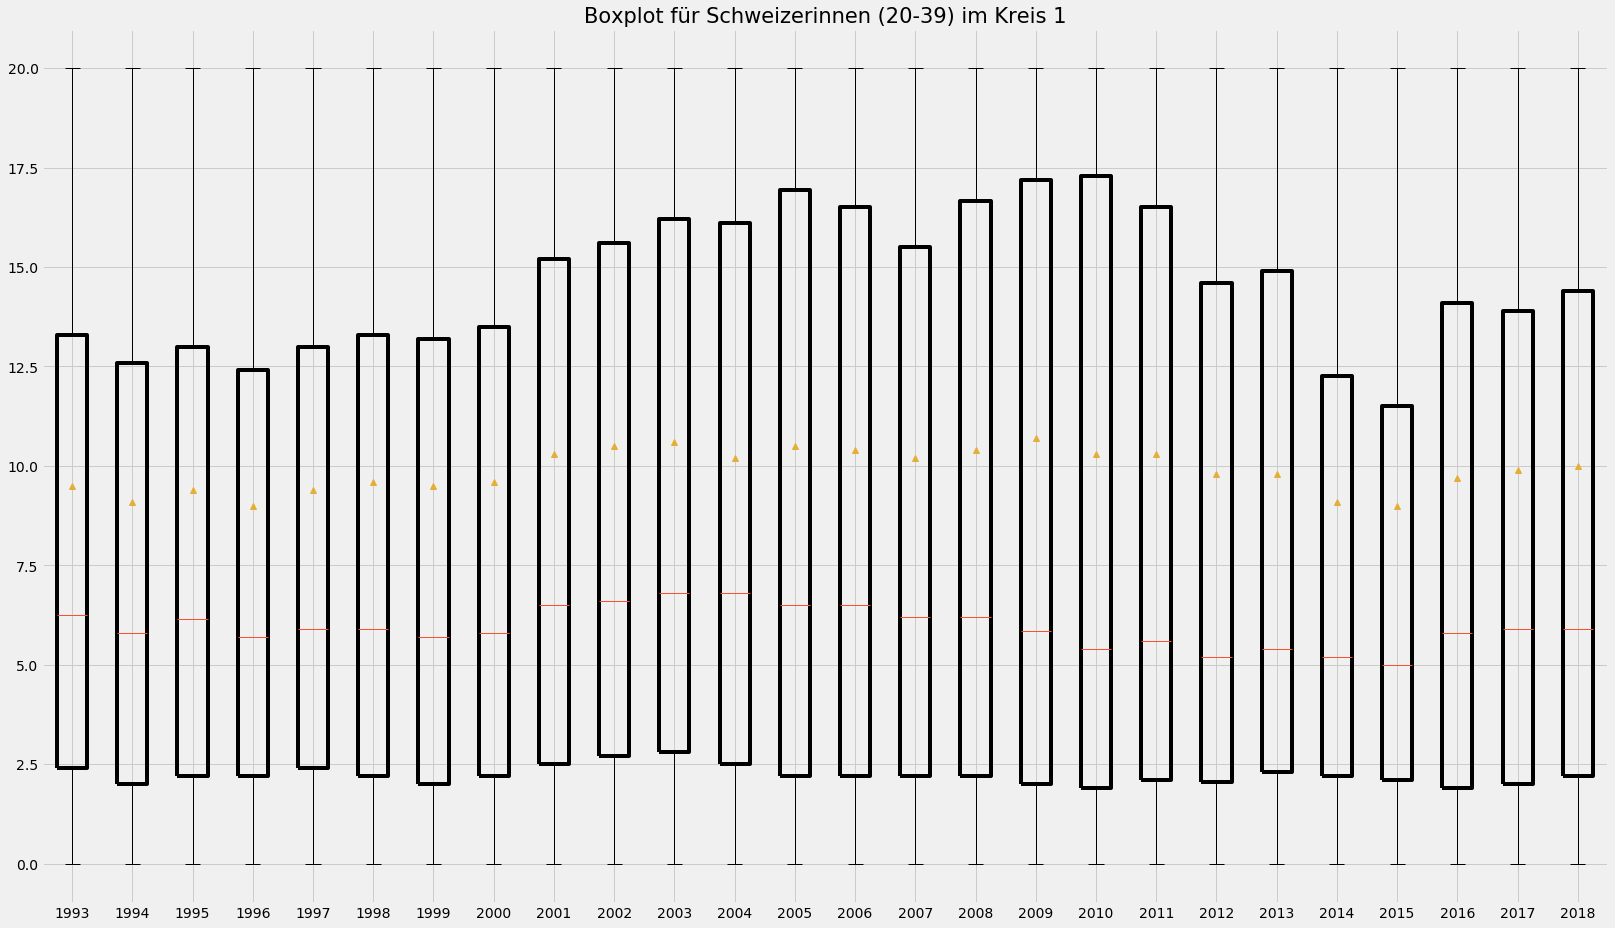

In [58]:
fs = 21  # fontsize

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 15), sharey=True)
axes.bxp(stats, showmeans=True)
axes.set_title('Boxplot für Schweizerinnen (20-39) im Kreis 1', fontsize=fs)
plt.show()